<a href="https://colab.research.google.com/github/Muhammadsulton1/MIPT_Data_analys/blob/main/1_MIPT_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving winequality-white.csv to winequality-white.csv


{'winequality-white.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;6\n8.1;0.27;0.41;1.45;0.033;11;63;0.9908;2.99;0.56;12;5\n8.6;0.23;0.4;4.2;0.035;17;109;0.9947;3.14;0.53;9.7;5\n7.9;0.18;0.37;1.2;0.04;16;75;0.992;3.18;0.63;10.8;5\n6.6;0.16;0.4;1.5;0.044;48;143;0.9912;3.54;0.52;12.4;7\n8.3;0.42;0.62;19.25;0.04;41;172;1.0002;2.98;0.67;9.7;5\n6.6;

Для белого вина

In [ ]:
data = pd.read_csv('winequality-white.csv',sep=';')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Выводим транспонированную таблицу описательной статистики с 33% и 66% перцентилем

In [ ]:
data.describe(percentiles=[0.33,0.66]).T

,count,mean,std,min,33%,50%,66%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.50000,6.80000,7.1000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.23000,0.26000,0.3000,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.28000,0.32000,0.3600,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,2.30000,5.20000,7.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.03800,0.04300,0.0470,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,27.00000,34.00000,41.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,116.00000,134.00000,155.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.99238,0.99374,0.9953,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.12000,3.18000,3.2400,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.43000,0.47000,0.5200,1.08000


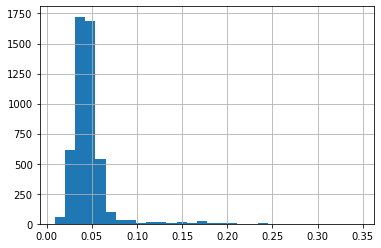

In [ ]:
data['chlorides'].hist(bins=30);

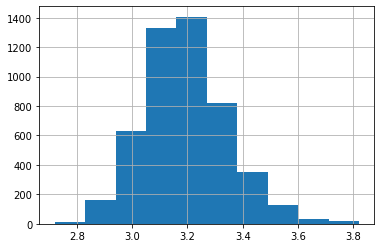

In [ ]:
data['pH'].hist();

мне показалось, что столбец total sulfur dioxide	 имеет логнормальное распределение и поэтому преобразую логорофирование этой таблицы и построю гистограмму

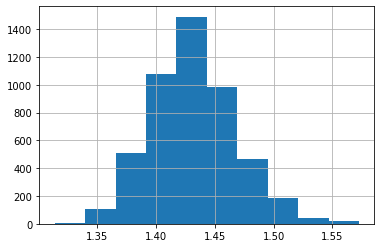

In [ ]:
np.log1p(data["pH"]).hist();

после построения гистограммы можно предположить, что график имеет распределение близкое к нормальному

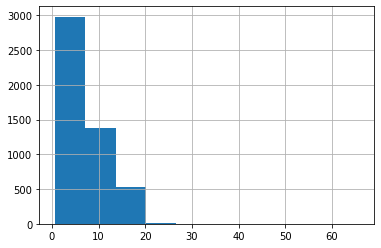

In [ ]:
data['residual sugar'].hist();

In [ ]:
white = data.groupby('quality',as_index=False).median()

In [ ]:
white

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,7.3,0.26,0.345,4.60,0.041,33.5,159.5,0.994425,3.215,0.44,10.45
1,4,6.9,0.32,0.290,2.50,0.046,18.0,117.0,0.994100,3.160,0.47,10.10
2,5,6.8,0.28,0.320,7.00,0.047,35.0,151.0,0.995300,3.160,0.47,9.50
3,6,6.8,0.25,0.320,5.30,0.043,34.0,132.0,0.993660,3.180,0.48,10.50
4,7,6.7,0.25,0.310,3.65,0.037,33.0,122.0,0.991760,3.200,0.48,11.40
5,8,6.8,0.26,0.320,4.30,0.036,35.0,122.0,0.991640,3.230,0.46,12.00
6,9,7.1,0.27,0.360,2.20,0.031,28.0,119.0,0.990300,3.280,0.46,12.50


In [ ]:
data.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

как можно заметить из группированной таблицы и матрицы корреляции, что три параметр алкоголь положительно коррелирует с оценкой качества вина,а два остальных параметра density и chloridies отрицательно коррелируют с качеством вина

как видим по увелечению процента алкоголя в вине и растет качество вина

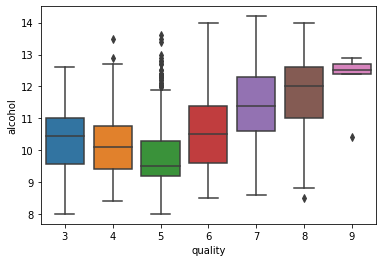

In [ ]:
sns.boxplot(x=data['quality'],y=data['alcohol']);

уменьшение chloridies улучшается качества вина

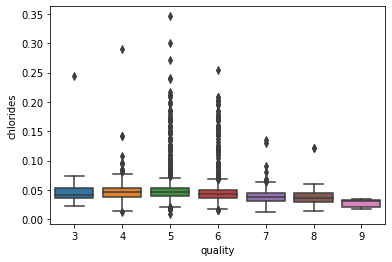

In [ ]:
sns.boxplot(x=data['quality'],y=data['chlorides']);

уменьшение density  улучшается качество вина

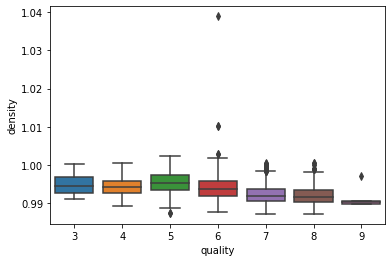

In [ ]:
sns.boxplot(x=data['quality'],y=data['density']);

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


генерация выборки

In [ ]:
std = data['total sulfur dioxide'].std()
tS = tS = 1.96 # 95%
N_g = data.shape[0]
dx = 3.5
V_sample = tS**2 * std**2 * N_g / (dx**2 * N_g + tS**2 * std**2)
V_sample

507.68177950083196

In [ ]:
# Генерация набора индексов для выборки
sample = np.random.randint(data.shape[0], size = 507)

In [ ]:
sample

array([4599,  191, 2942, 1034,  334,  205, 4577, 1121, 2108,  215,  513,
       3346,  740, 1516, 1426, 3726, 3888,  948, 1466, 1024, 2688, 2503,
       3482, 1934, 1645,  959, 3925,  494,  989,  837, 2901, 1365, 4294,
       2581,  875, 2539, 1343, 3304, 1396, 2184,  330,  440, 2403, 4194,
       2376,  870, 3146, 3554, 4197, 3657, 3560, 2946,  541,  649, 4273,
       2671, 2301,   44, 2156, 4752, 3875, 1516, 4660, 4315, 2596, 3215,
        418, 3958, 4030, 1584,  635, 1151,  439, 2324, 4147, 4676, 4067,
       3484, 1324, 3911, 2523, 3919, 3898, 3921, 3575, 3751, 2291,  315,
         70, 3342, 3726, 4485, 4025, 1830, 3124, 1112, 2833, 3008, 4574,
       3729, 4162,  907, 2750,  265,  572,  512, 4548, 4347, 4510,  172,
       1289, 2427, 2069, 1535, 2479, 1849, 4077, 4716, 1403, 2885, 4367,
       4871,  797, 2189, 2636, 1361,  955, 3707, 1511, 2683, 3377,  153,
       2106,  578,  477, 4122,   28, 4799, 4317, 3285, 2913,  789,  315,
        323,  451, 1310, 1830, 1779, 2168, 1518, 33

In [ ]:
print(np.shape(sample))

(507,)


In [ ]:
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.9;0.

In [ ]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red = df.groupby('quality',as_index=False).median()

In [ ]:
red

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,7.50,0.845,0.035,2.1,0.0905,6.0,15.0,0.997565,3.39,0.545,9.925
1,4,7.50,0.670,0.090,2.1,0.0800,11.0,26.0,0.996500,3.37,0.560,10.000
2,5,7.80,0.580,0.230,2.2,0.0810,15.0,47.0,0.997000,3.30,0.580,9.700
3,6,7.90,0.490,0.260,2.2,0.0780,14.0,35.0,0.996560,3.32,0.640,10.500
4,7,8.80,0.370,0.400,2.3,0.0730,11.0,27.0,0.995770,3.28,0.740,11.500
5,8,8.25,0.370,0.420,2.1,0.0705,7.5,21.5,0.994940,3.23,0.740,12.150


In [ ]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64